# 한글

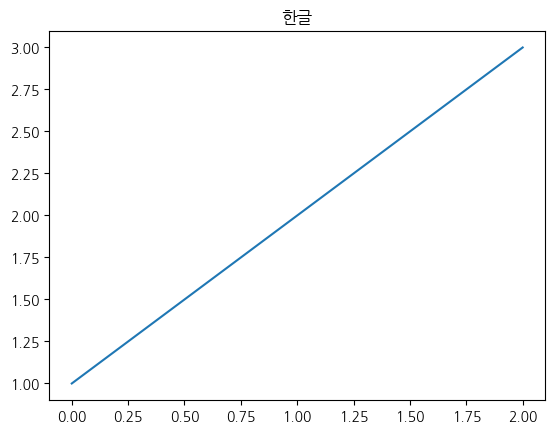

In [1]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

plt.rc("font", family="NanumGothic") # 라이브러리 불러오기와 함께 한번만 실행
from sklearn.preprocessing import MinMaxScaler, StandardScaler

plt.plot([1, 2, 3])
plt.title("한글")
plt.show()

# 데이터불러오기

In [2]:
# CSV 파일 불러오기
data = pd.read_csv('data/액체_모델용.csv') 

In [3]:
data.columns

Index(['Datetime', 'ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호',
       '입항일시', '출항일시', '접안_대기시간_분', '출항_대기시간_분', 'Service_Time_Start',
       'Service_Time_End', '계선장소_코드', '계선장소_숫자', '계선장소명', '선박용도',
       'Service_Time_분', '대기율', '총톤수', '재화중량톤수', '선박제원(총길이, m)', '선박제원(너비, m)',
       '만재흘수(m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', '풍향(deg)',
       'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
       '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '액체화물'],
      dtype='object')

In [4]:
# 두 칼럼을 합쳐 새로운 칼럼 생성
data['계선장소'] = data['계선장소_코드'].astype(str) + data['계선장소_숫자'].astype(str)

# '계선장소_코드'와 '계선장소_숫자컬럼' 칼럼 삭제
data = data.drop(['계선장소_코드', '계선장소_숫자'], axis=1)


# 캣부스트 베이스라인 코드

In [5]:
리스타트import pandas as pd
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 특성과 타겟 분리
X = data[['ETA_Hour', '계선장소', '선박용도', 'Service_Time_분', '총톤수',
          '선박제원(총길이, m)', '선박제원(너비, m)', '깊이(m)', '길이1(m)', 'ETA_Minute', '풍속(m/s)', 
          '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)', '최대파고(m)',
          '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)']]
y = data['접안_대기시간_분']

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=12)

# 성능 지표 초기화
rmse_scores = []
r2_scores = []

# KFold를 이용한 교차 검증
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost 모델 생성 및 훈련
    model = CatBoostRegressor(iterations=500,
                              learning_rate=0.3,
                              depth=10, 
                              loss_function='RMSE',
                              cat_features=['계선장소', '선박용도'],
                              verbose=100)
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 계산
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    r2 = r2_score(y_val, y_pred)

    # 성능 지표 저장
    rmse_scores.append(rmse)
    r2_scores.append(r2)

# 교차 검증 결과 출력
print(f'Average RMSE: {sum(rmse_scores) / len(rmse_scores)}')
print(f'Average R2 Score: {sum(r2_scores) / len(r2_scores)}')

# 피처 임포턴스 시각화
feature_importance = model.get_feature_importance()
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()


SyntaxError: invalid syntax (720078420.py, line 1)

# 최종 비교용 모델

## 수정(참고내용)

In [6]:
import pandas as pd
# CSV 파일 불러오기
Final_D = pd.read_csv('data/for_ship_model.csv') 

In [7]:
Final_D.columns

Index(['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박제원(총길이, m)', '선박제원(너비, m)', '만재흘수(m)', '깊이(m)', '길이1(m)', '풍속(m/s)',
       '풍향(deg)', 'GUST풍속(m/s)', '현지기압(hPa)', '습도(%)', '기온(°C)', '수온(°C)',
       '최대파고(m)', '유의파고(m)', '평균파고(m)', '파주기(sec)', '파향(deg)', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded'],
      dtype='object')

In [8]:
Final_D.columns = ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour', '호출부호', '접안_대기시간_분',
       '계선장소명', '선박용도', 'Service_Time_분', '대기율', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '선박_길이1', '풍속',
       '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온',
       '최대파고', '유의파고', '평균파고', '파주기', '파향', '이전_입항선박수',
       '연도별_선석점유율', '시설연평균_재화중량톤수', '연평균_총입항건수', '선박_연평균_서비스시간', '선박_연평균_대기시간',
       '호출부호_encoded', '계선장소명_encoded', '선박용도_encoded']

x_cols = ['ETA_Year', 'ETA_Month', 'ETA_Day', 'ETA_Hour',
       'Service_Time_분', '총톤수', '재화중량톤수',
       '선박_총길이', '선박_너비', '선박_만재흘수', '선박_깊이', '풍속',
       '풍향', 'GUST풍속', '현지기압', '습도', '기온', '수온', '최대파고', '유의파고', '평균파고',
        '파주기', '파향', '이전_입항선박수','시설연평균_재화중량톤수', 
        '연평균_총입항건수', '선박_연평균_서비스시간', '계선장소명_encoded', '선박용도_encoded']

## 모델링

0:	learn: 1106.8360014	test: 1144.8848160	best: 1144.8848160 (0)	total: 194ms	remaining: 1m 36s
100:	learn: 760.5461965	test: 1086.5302148	best: 1082.9973669 (56)	total: 5.19s	remaining: 20.5s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1082.997367
bestIteration = 56

Shrink model to first 57 iterations.
0:	learn: 1117.6749687	test: 1046.8250270	best: 1046.8250270 (0)	total: 49.7ms	remaining: 24.8s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 998.4840383
bestIteration = 49

Shrink model to first 50 iterations.
0:	learn: 1116.2085470	test: 1052.0252235	best: 1052.0252235 (0)	total: 46.6ms	remaining: 23.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 993.1363843
bestIteration = 25

Shrink model to first 26 iterations.
0:	learn: 1108.3114635	test: 1141.1745534	best: 1141.1745534 (0)	total: 43.8ms	remaining: 21.9s
100:	learn: 748.6679481	test: 1077.8950768	best: 1077.8950768 (100)	total: 5.06s	remaining: 20s
Stopped by overfit

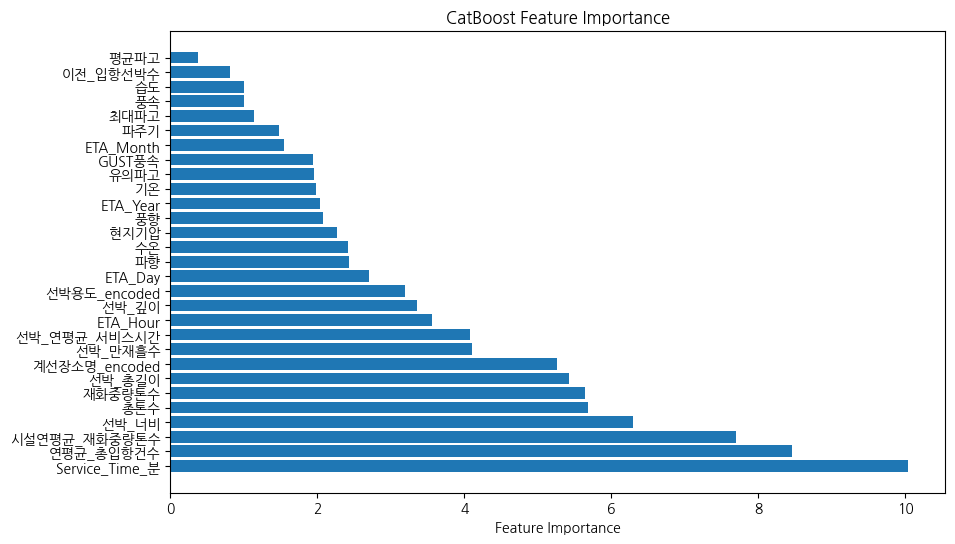

In [9]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 특성과 타겟 분리
X = Final_D[x_cols]
y = Final_D['접안_대기시간_분']

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=12)

# 성능 지표 초기화
rmse_scores = []

# KFold를 이용한 교차 검증
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost 모델 생성 및 훈련
    model = CatBoostRegressor(iterations=500,
                              learning_rate=0.3,
                              depth=10, 
                              loss_function='RMSE',
                              verbose=100)
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 계산
    rmse = mean_squared_error(y_val, y_pred, squared=False)

    # 성능 지표 저장
    rmse_scores.append(rmse)


# 교차 검증 결과 출력
print(f'Average RMSE: {sum(rmse_scores) / len(rmse_scores)}')

# 피처 임포턴스 시각화
feature_importance = model.get_feature_importance()
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()


0:	learn: 1106.8360014	test: 1144.8848160	best: 1144.8848160 (0)	total: 47ms	remaining: 23.4s
100:	learn: 760.5461965	test: 1086.5302148	best: 1082.9973669 (56)	total: 4.97s	remaining: 19.6s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1082.997367
bestIteration = 56

Shrink model to first 57 iterations.
0:	learn: 1117.6749687	test: 1046.8250270	best: 1046.8250270 (0)	total: 46.4ms	remaining: 23.2s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 998.4840383
bestIteration = 49

Shrink model to first 50 iterations.
0:	learn: 1116.2085470	test: 1052.0252235	best: 1052.0252235 (0)	total: 50.7ms	remaining: 25.3s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 993.1363843
bestIteration = 25

Shrink model to first 26 iterations.
0:	learn: 1108.3114635	test: 1141.1745534	best: 1141.1745534 (0)	total: 51.9ms	remaining: 25.9s
100:	learn: 748.6679481	test: 1077.8950768	best: 1077.8950768 (100)	total: 4.94s	remaining: 19.5s
Stopped by overfit

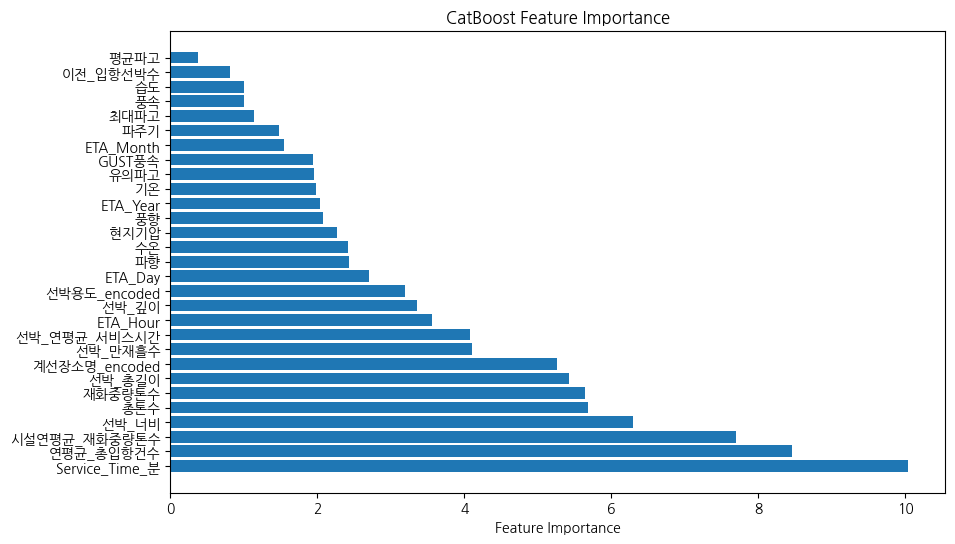

In [10]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Added import for MAE
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 특성과 타겟 분리
X = Final_D[x_cols]
y = Final_D['접안_대기시간_분']

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=12)

# 성능 지표 초기화
rmse_scores = []
mae_scores = []  # Added to store MAE scores

# KFold를 이용한 교차 검증
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost 모델 생성 및 훈련
    model = CatBoostRegressor(iterations=500,
                              learning_rate=0.3,
                              depth=10, 
                              loss_function='RMSE',
                              verbose=100)
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 계산
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mae = mean_absolute_error(y_val, y_pred)  # Added MAE calculation

    # 성능 지표 저장
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# 교차 검증 결과 출력
print(f'Average RMSE: {sum(rmse_scores) / len(rmse_scores)}')
print(f'Average MAE: {sum(mae_scores) / len(mae_scores)}')  # Added MAE output

# 피처 임포턴스 시각화
feature_importance = model.get_feature_importance()
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()


In [11]:
# 개인적으로 해보는


In [14]:
fil_cols = ['Service_Time_분', '선박_연평균_서비스시간', '시설연평균_재화중량톤수', '총톤수', '선박_총길이',
          '재화중량톤수', '연평균_총입항건수', '계선장소명_encoded']

0:	learn: 1104.1272631	test: 1146.3380675	best: 1146.3380675 (0)	total: 20.8ms	remaining: 10.4s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 1076.77498
bestIteration = 25

Shrink model to first 26 iterations.
0:	learn: 1114.9436872	test: 1047.9663534	best: 1047.9663534 (0)	total: 22.3ms	remaining: 11.1s
100:	learn: 856.9100677	test: 998.8228782	best: 994.8527590 (71)	total: 2.13s	remaining: 8.42s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 994.852759
bestIteration = 71

Shrink model to first 72 iterations.
0:	learn: 1114.2318885	test: 1047.7824382	best: 1047.7824382 (0)	total: 20.3ms	remaining: 10.1s
100:	learn: 854.8262883	test: 995.5365166	best: 988.3406486 (52)	total: 2.36s	remaining: 9.33s
Stopped by overfitting detector  (50 iterations wait)

bestTest = 988.3406486
bestIteration = 52

Shrink model to first 53 iterations.
0:	learn: 1106.3006277	test: 1143.1678106	best: 1143.1678106 (0)	total: 27.7ms	remaining: 13.8s
100:	learn: 849.2185146

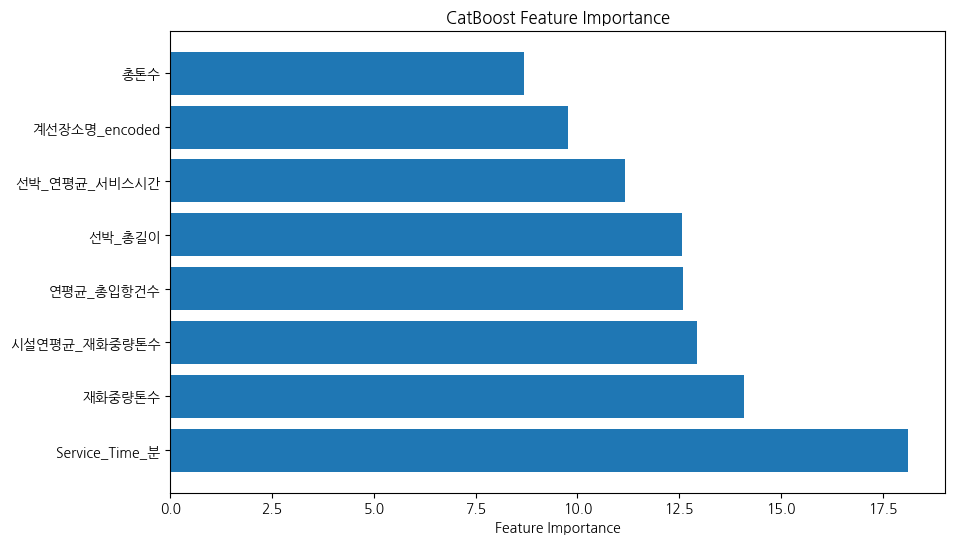

In [15]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error  # Added import for MAE
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

# 특성과 타겟 분리
X = Final_D[fil_cols]
y = Final_D['접안_대기시간_분']

# KFold 설정
kf = KFold(n_splits=10, shuffle=True, random_state=12)

# 성능 지표 초기화
rmse_scores = []
mae_scores = []  # Added to store MAE scores

# KFold를 이용한 교차 검증
for train_idx, val_idx in kf.split(X):
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]

    # CatBoost 모델 생성 및 훈련
    model = CatBoostRegressor(iterations=500,
                              learning_rate=0.3,
                              depth=10, 
                              loss_function='RMSE',
                              verbose=100)
    
    model.fit(X_train, y_train, eval_set=(X_val, y_val), early_stopping_rounds=50, verbose=100)

    # 예측
    y_pred = model.predict(X_val)

    # 평가 지표 계산
    rmse = mean_squared_error(y_val, y_pred, squared=False)
    mae = mean_absolute_error(y_val, y_pred)  # Added MAE calculation

    # 성능 지표 저장
    rmse_scores.append(rmse)
    mae_scores.append(mae)

# 교차 검증 결과 출력
print(f'Average RMSE: {sum(rmse_scores) / len(rmse_scores)}')
print(f'Average MAE: {sum(mae_scores) / len(mae_scores)}')  # Added MAE output

# 피처 임포턴스 시각화
feature_importance = model.get_feature_importance()
feature_names = X.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))

sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_feature_names)), sorted_feature_importance, align='center')
plt.yticks(range(len(sorted_feature_names)), sorted_feature_names)
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.show()
